# IBM MACHINE LEARNING - PROJECT A
## Treatment Costs per Person - Exploratory & Predictive Analysis
### Price Forecast by Using Linear Regression & Hypothesis Testing 

In [1]:
# Import the necessary libraries 
import numpy as np # For linear algebra
import pandas as pd # For data frame manipulation
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization
%matplotlib inline


from sklearn.model_selection import train_test_split # For splitting the data 
from sklearn import linear_model # For ML training
from sklearn.metrics import mean_squared_error # For ML accuracy
from sklearn.metrics import r2_score # For ML accuracy
from sklearn.preprocessing import PolynomialFeatures # For feature transformation


In [2]:
data = pd.read_csv('/Users/salahkaf/Downloads/HealthCost.csv')

### Brief Description of Data and Summary of its Attributes 

This data set provides 6 features about a person in order to predict the cost of medical treatment

**Attributes of the data set are as follows,**
**<br>1 - Age: How old is the person.
<br>2 - Sex: Male or Female.
<br>3 - BMI: Body to Mass ratio.
<br>4 - Children: Number of children.
<br>5 - Smokers: Whether they smoke or not.
<br>6 - Region: The person's region.
<br>7 - Charges: The cost of medical treatment.**

### Data Exploration

In [3]:
print("Data frame first five rows")
display(data.head())
print("")
print("----------------------------------------")
print("Data frame last five rows")
display(data.tail())

Data frame first five rows


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



----------------------------------------
Data frame last five rows


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
data.shape # Number of rows and columns

(1338, 7)

In [5]:
data.isnull().sum() #Checking for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info() #General summary about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe().T #General statistics about the data set

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data.region.value_counts() #Count how many persons per region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### EDA 

**I - Pair Plot**

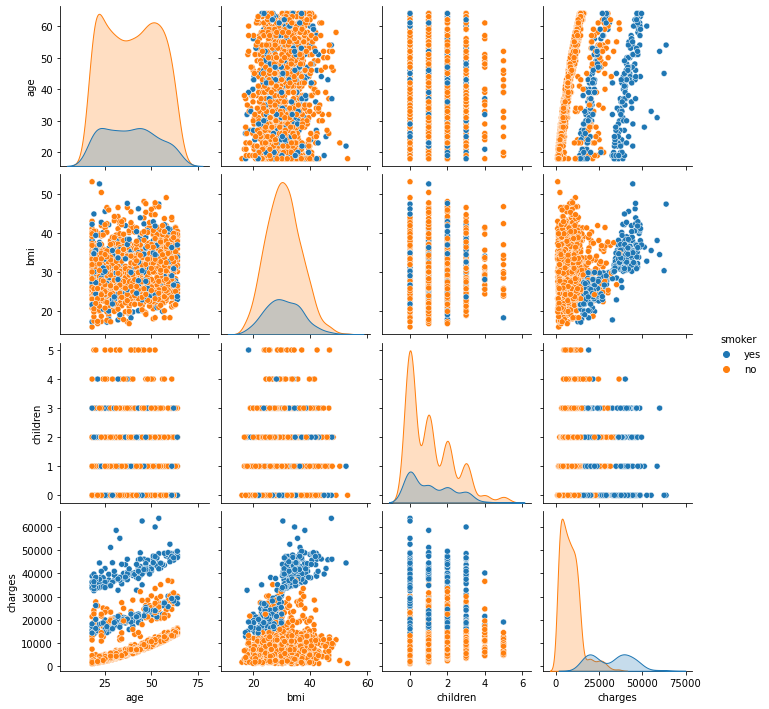

In [9]:
sns.pairplot(data, hue = 'smoker')

**II - Charges Box Plot**

<AxesSubplot:xlabel='children', ylabel='charges'>

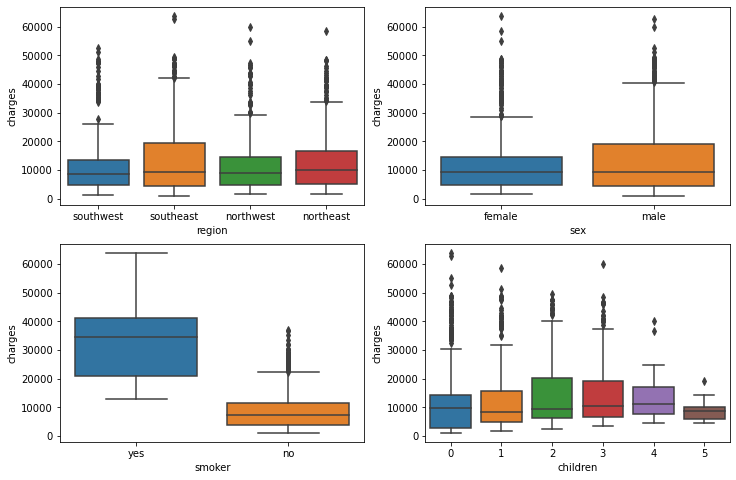

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='region',y='charges', data=data)
plt.subplot(2,2,2)
sns.boxplot(x='sex', y='charges',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='smoker', y='charges', data=data)
plt.subplot(2,2,4)
sns.boxplot(x='children', y='charges', data = data)

<AxesSubplot:xlabel='children', ylabel='charges'>

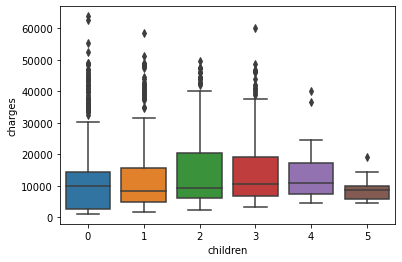

In [11]:
sns.boxplot(x='children', y='charges', data = data)

**III - Charges Bar Plot**

<AxesSubplot:xlabel='charges', ylabel='Count'>

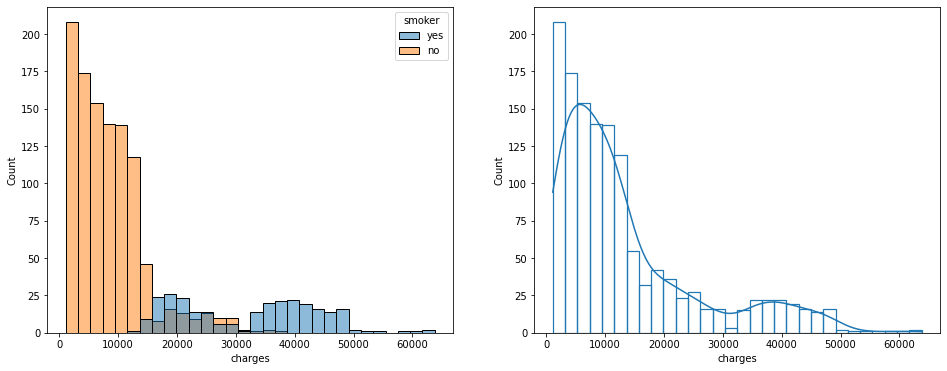

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(x = data.charges,hue = data.smoker)
plt.subplot(1,2,2)
sns.histplot(data.charges, fill=False, kde=True)

**IV - Age Distribution Bar plot**

<AxesSubplot:xlabel='age', ylabel='Count'>

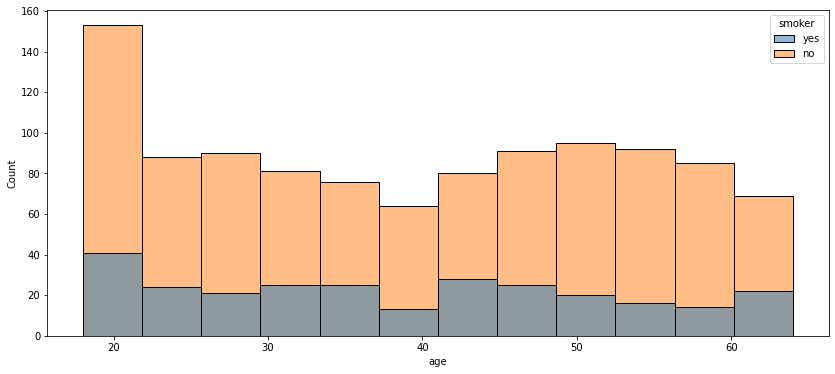

In [13]:
plt.figure(figsize=(14 ,6))
sns.histplot(x=data.age, hue=data.smoker)

**V - Children per Region & Age per Children violin plots**


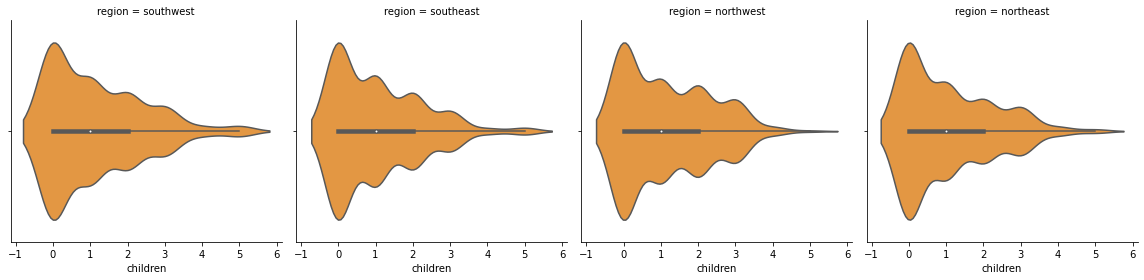

In [14]:
g = sns.FacetGrid(data, col='region', height=4)
g.map(sns.violinplot, 'children', order = None, palette='YlOrBr')

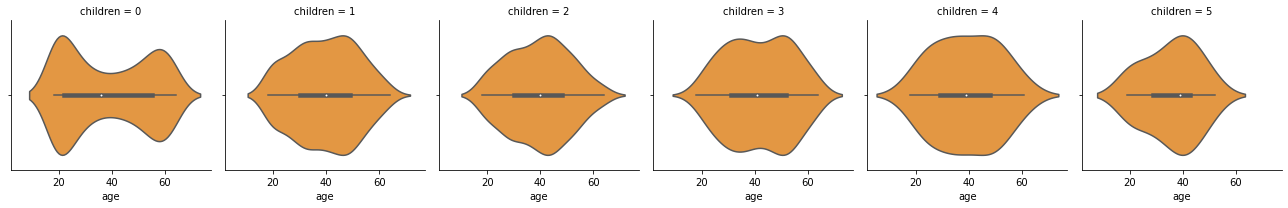

In [15]:
g = sns.FacetGrid(data, col='children', height=3)
g.map(sns.violinplot, 'age', order = None, palette='YlOrBr')

**VI - Gender vs Charges**

<Figure size 864x576 with 0 Axes>

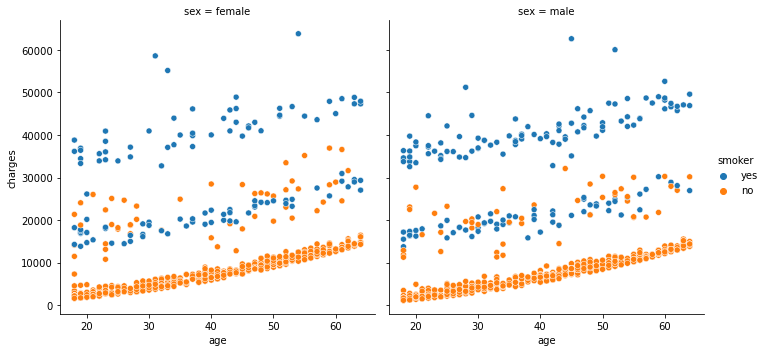

In [16]:
plt.figure(figsize=(12, 8))
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=data)

**VII - BMI vs Charges based on smoking status**

<Figure size 720x432 with 0 Axes>

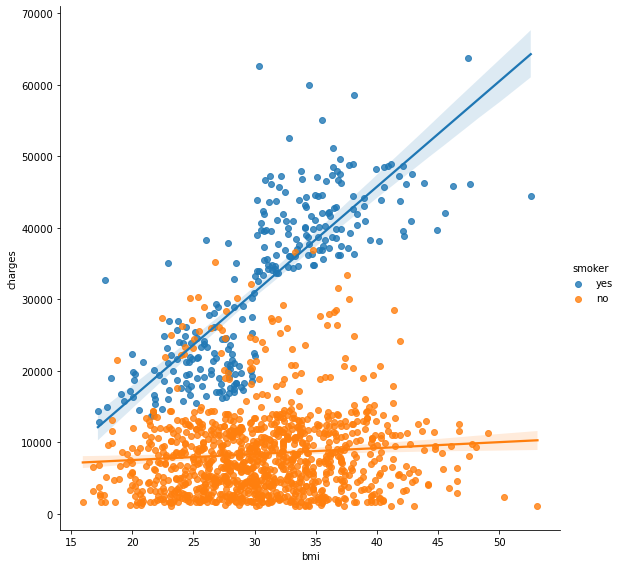

In [17]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=data, height=8)

**VIII - Smoker Count per Sex**

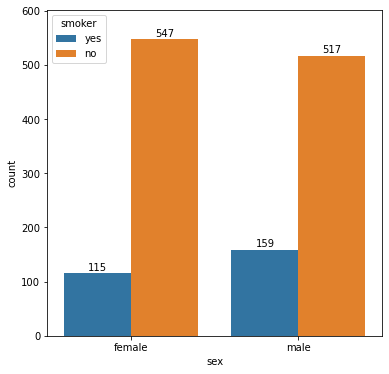

In [18]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=data.sex, hue=data.smoker)
#To add number to the visual
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

<Figure size 720x432 with 0 Axes>

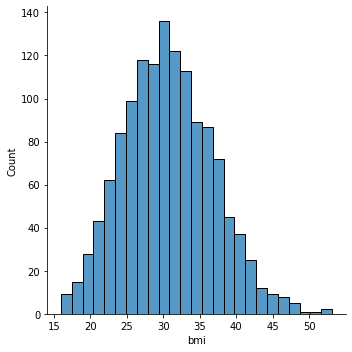

In [19]:
plt.figure(figsize=(10, 6))
sns.displot(data.bmi)

### Data Cleaning and Feature Engineering

In [20]:
display(data.head()) #Original df
data["sex"].replace({"male": "1", "female": "0"}, inplace=True) #Encoding
data["smoker"].replace({"yes": "1", "no": "0"}, inplace=True) #Encoding
data = data.astype({"sex": int, "smoker": int})
display(data.head()) #new df
data.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [21]:
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [22]:
#Make columns as integer to make correlation heat map

data = data.astype({'region_northeast': int,'region_northwest': int,'region_southeast': int,'region_southwest': int})

#Relocate charges column to the last
column_to_move = data.pop("charges")

# insert column with insert(location, column_name, column_value)

data.insert(9, "charges", column_to_move)

data.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


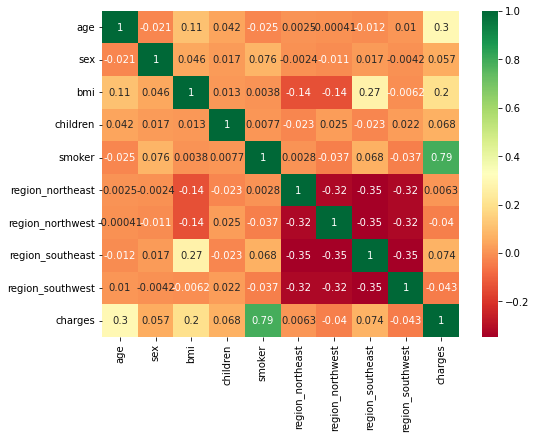

In [23]:
#get correlations of each features in dataset
corrmat = data.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(8,6))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True,cmap="RdYlGn")


#Listing them 
corrmat.sort_values(['charges'], ascending=False, inplace=True)
print(corrmat.charges)

In [24]:
# Removing the regions since they are insignificant to charges
data.drop(['region_southeast','region_southwest','region_northwest','region_northeast'], axis = 1, inplace = True)
data.head(10) #Final df with correlated attributes to charges

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


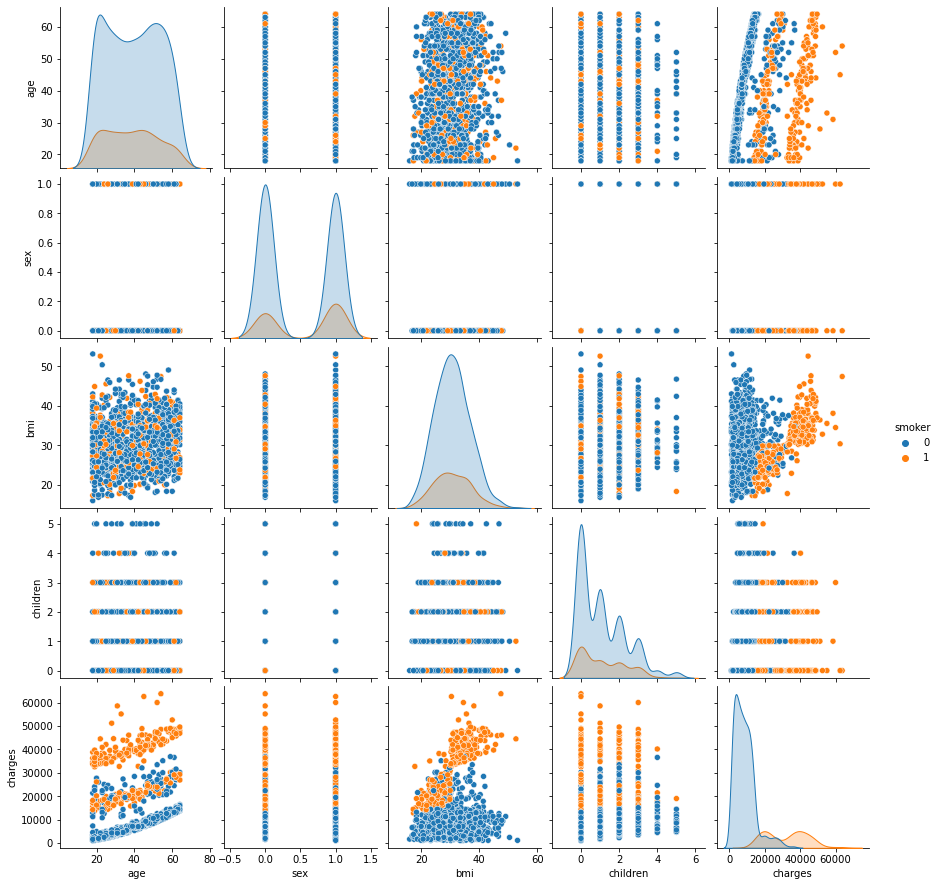

In [25]:
sns.pairplot(data, hue = 'smoker')

### Creating the Regression Model

In [26]:
# Checking the skewed values: 

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data.skew()
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
charges,1.515880
smoker,1.464766
children,0.938380


In [27]:
y = data.charges #Target feature
X = data.loc[:,['age','sex','bmi','children','smoker']] # Predictor features

#Create Polynomial transofrmation to remove skewness.

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X) #Features after being transforrmed.


# Splitting the data 
train_X, test_X, train_y, test_y = train_test_split(x_poly, y, test_size=0.25, random_state=1)

print("Original shape is", X.shape, y.shape)
print("training features set size is", train_X.shape, "And test set size is", test_X.shape)
print("training  target feature set size is", train_y.shape, "And test set size is", test_y.shape)

Original shape is (1338, 5) (1338,)
training features set size is (1003, 21) And test set size is (335, 21)
training  target feature set size is (1003,) And test set size is (335,)


In [28]:
lre = linear_model.LinearRegression() #Defining the model


train_y_ = lre.fit(train_X, train_y) #Training the model

# print ('Coefficients: ', lre.coef_)
# print ('Intercept: ',lre.intercept_)

test_y_ = lre.predict(test_X) #Predicting the x test set

#Evaluation 

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 2792.39
Residual sum of squares (MSE): 21822151.83
R2-score: 0.84


## Key Findings & Insights

**1 - In this data set, smoking is the main factor for treatment cost raises.
<br> 2 - Overweight and old people have slightly-mid more expensive medical treatments.
<br> 3 - Using smoking status, BMI & Age, we can  estimate the treatment costs using polynomial regression.
<br> 4 - Number of children and the region do not have an impactful effect on the charges.**

## Formulating 3 Hypothesis about the Data

**Hypothesis testing is a stastical infrence method, i.e., in the end of the analysis we shall draw a conclusion.**
**"The hypothesis that the estimate is based solely on chance is called the null hypothesis. Thus, the null hypothesis is true if the observed data (in the sample) do not differ from what would be expected on the basis of chance alone. The complement of the null hypothesis is called the alternative hypothesis.
The null hypothesis is typically abbreviated as H0 and the alternative hypothesis as H1. Since the two are complementary (i.e. H0 is true if and only if H1 is false), it is sufficient to define the null hypothesis."** 
Reference for more on hypothesis testing: https://www.real-statistics.com/hypothesis-testing/null-hypothesis/

### Hypothesis One

**Null hypothesis: 20K+ cost of charges is not a statistically significant indicator whether someone is a smoker or not.**
<br> **Alternate hypothesis: If someone's charges is 20K or more, he is a smoker.**

### Hypothesis Two

**Null hypothesis: 30K+ cost of charges is not a statistically significant indicator whether someone is a smoker or not.**
<br> **Alternate hypothesis: If someone's charges is 30K or more, he is a smoker.**

### Hypothesis Three

**Null hypothesis: 35K+ cost of charges is not a statistically significant indicator whether someone is a smoker or not.**
<br> **Alternate hypothesis: If someone's charges is 35K or more, he is a smoker.**

## Conducting a Formal Significance Test for One of the Hypothesis

We set ` Significance level, i.e., 'alpha' as [ α = 0.05 ]`
Therefore we want a `p value <= 0.05` in order to reject the null hypothesis

In [29]:
# Filtering the data
charges_20K = data[data['charges'] >= 20000]
charges_30K = data[data['charges'] >= 30000]
charges_35K = data[data['charges'] >= 35000]


display(charges_20K.smoker.value_counts())
display(charges_30K.smoker.value_counts())
display(charges_35K.smoker.value_counts())

1    212
0     61
Name: smoker, dtype: int64

1    152
0     10
Name: smoker, dtype: int64

1    130
0      3
Name: smoker, dtype: int64

In [30]:
print("Probability of finding a non-smoker whose charges is more than or equal to 20K is", round(61/(212+61),3))
print("In other words, we have a confidince level of", 1 - round(61/(212+61),3), "that when someone's charges is 20K or more, he/she is a smoker.")
print("We accept the null hypothesis since we have a p = 0.223, which is greater than the significane level α.")

Probability of finding a non-smoker whose charges is more than or equal to 20K is 0.223
In other words, we have a confidince level of 0.777 that when someone's charges is 20K or more, he/she is a smoker.
We accept the null hypothesis since we have a p = 0.223, which is greater than the significane level α.


In [31]:
print("Probability of finding a non-smoker whose charges is more than or equal to 30K is", round(10/(152+10),3))
print("In other words, we have a confidince level of", 1 - round(10/(152+10),3), "that when someone's charges is 30K or more, he/she is a smoker.")
print("We accept the null hypothesis since we have a p = 0.062, which is greater than the significane level α.")

Probability of finding a non-smoker whose charges is more than or equal to 30K is 0.062
In other words, we have a confidince level of 0.938 that when someone's charges is 30K or more, he/she is a smoker.
We accept the null hypothesis since we have a p = 0.062, which is greater than the significane level α.


In [32]:
print("Probability of finding a non-smoker whose charges is more than or equal to 35K is", round(3/(130+3),3))
print("In other words, we have a confidince level of", 1 - round(3/(130+3),3), "that when someone's charges is 35K or more, he/she is a smoker.")
print("We reject the null hypothesis since we have a p = 0.023, which is less than the significane level α")
print("We accept the alternate hypothesis, i.e., if someone's charges is 35K or more, he is a smoker.")

Probability of finding a non-smoker whose charges is more than or equal to 35K is 0.023
In other words, we have a confidince level of 0.977 that when someone's charges is 35K or more, he/she is a smoker.
We reject the null hypothesis since we have a p = 0.023, which is less than the significane level α
We accept the alternate hypothesis, i.e., if someone's charges is 35K or more, he is a smoker.


## Suggestions for Future Work

**I highly recommend to use different features transformations such as log transformation and re-evaluate the accuracy of the model. Furthermore, I would recommend to use different ML models and compare the accuracy with the linear regression model, which I used.**

## Conclusion & Quality of the Data 

**The data set is limited to only 7 attributes, of which 6 has been used in the prediction model, we need additional attributes such as the family history with diseases and chronic diseases situation.**
<br> **Overall, this data set is sufficient to provide general understanding of the treatment costs based.**